In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity



In [123]:
df = pd.read_csv('CC GENERAL.csv')

In [124]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Statistical description of the data:

In [125]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Data type and count info

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

DATA PROCESSING

In [127]:
df.drop(['CUST_ID'], axis=1, inplace=True)

We dropped the Customer ID column as it is a genric ID of customer and can not effect the clustering process.

Credit limit feature has just 1 record missing value. So, we can simply drop it and move on rather than imputing it with any value.

In [128]:
df.dropna(subset=['CREDIT_LIMIT'], inplace=True)

Now let's visualize the data a bit. We can gain some emperical insights (such as the amount of skewness) in the data.

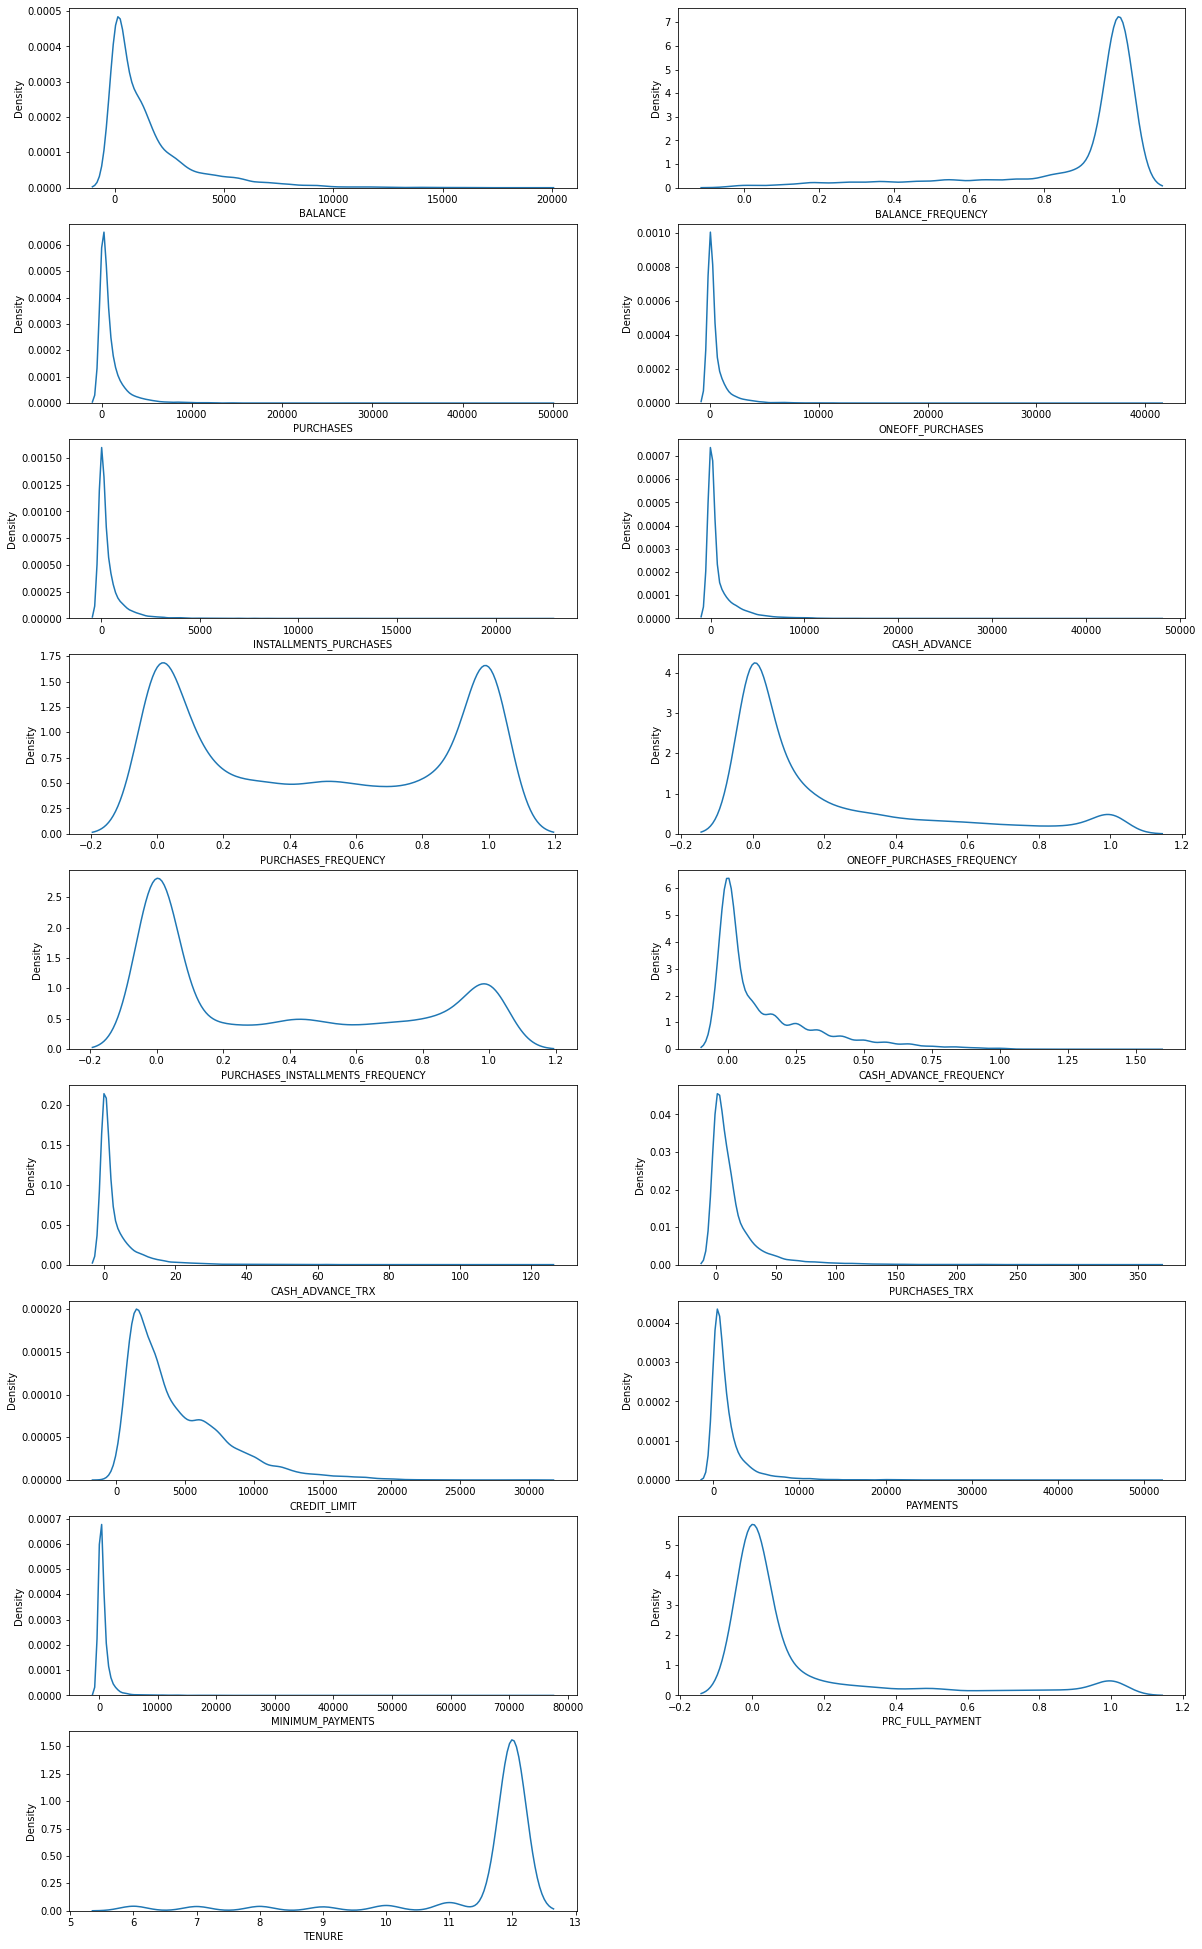

In [129]:
# Visualizing the data
plt.figure(figsize=(20,35))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

As we can see that the MINIMUM_PAYMENTS is a lot skewed, so we should use median (standard technique) to impuute the missing values in these.

In [130]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)

Making sure there is no null value

In [131]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

CORRELATION Analysis

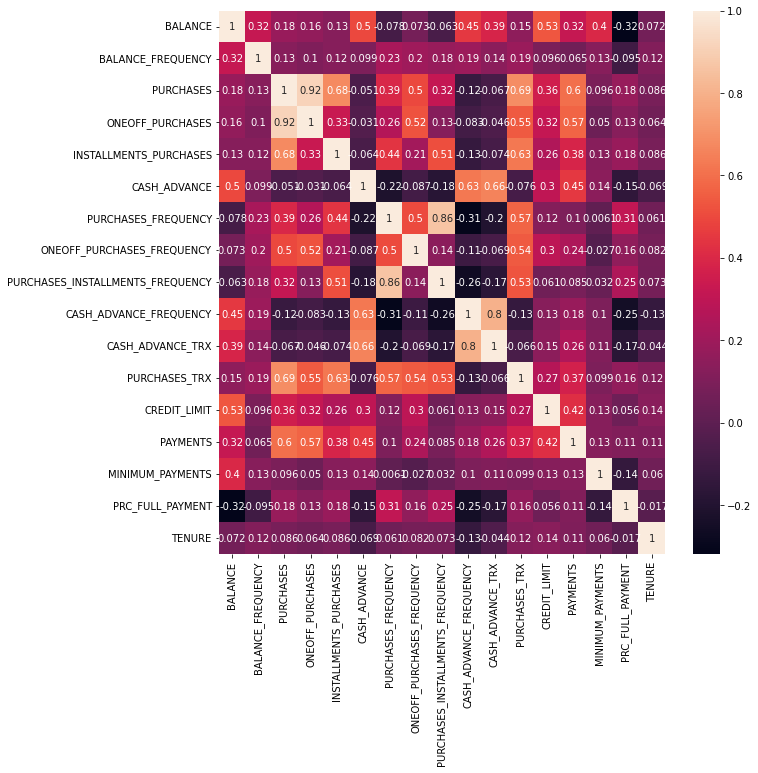

In [132]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

**Boxplot diagrams for outlier detection**

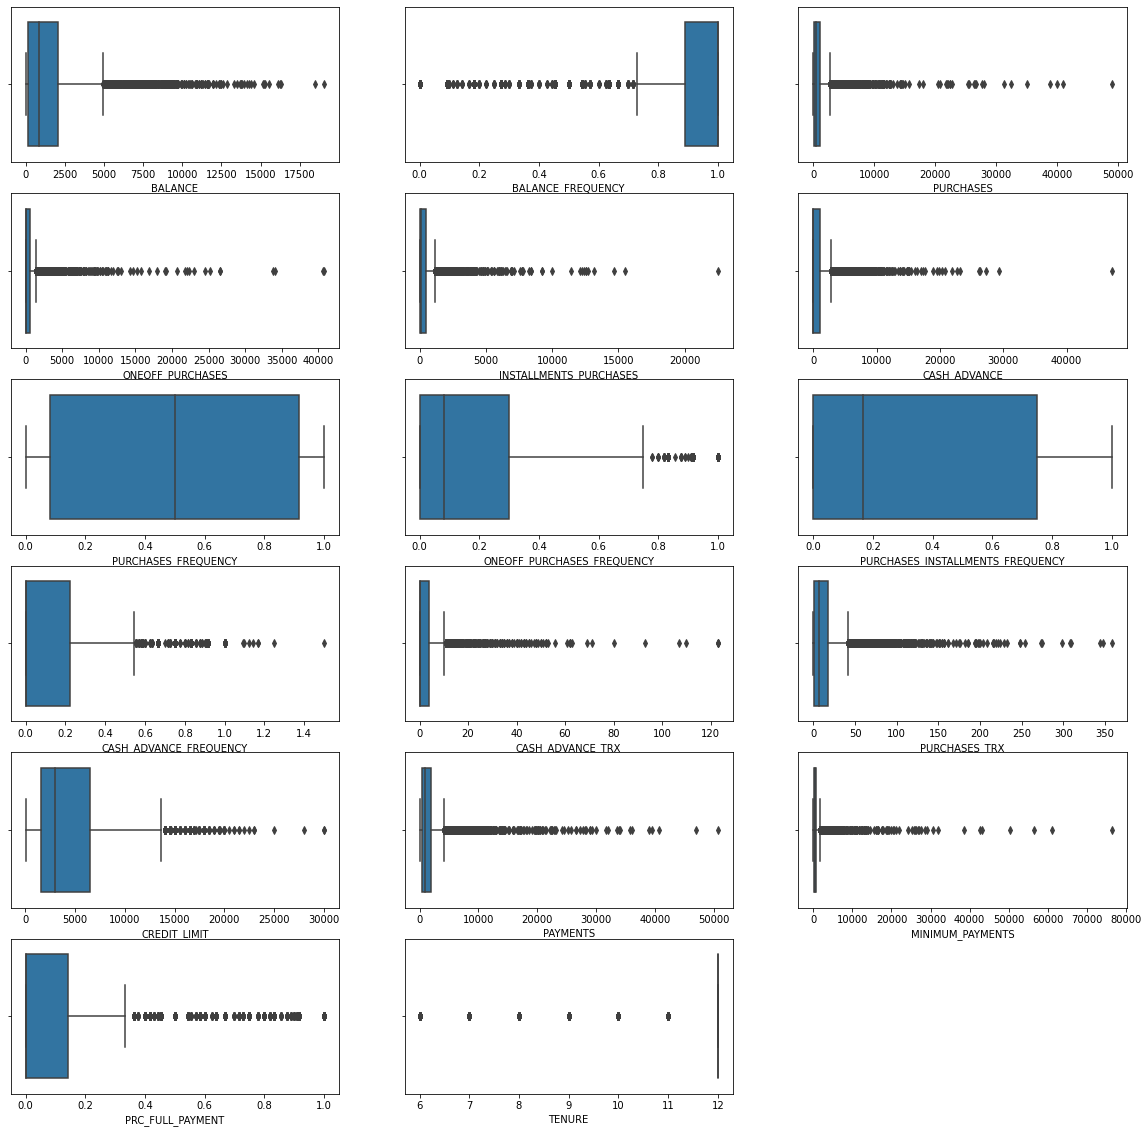

In [133]:
fig = plt.figure(figsize=(20,20))
for col in range(len(df.columns)) :
    fig.add_subplot(6,3,col+1)
    sns.boxplot(x=df.iloc[ : , col])
plt.show()

As we observe that there are too many outliers in the data, so we can not drop it. Instead we normalize the data to avoid any inconvenience regardig the outliers.

In [134]:
# Normalizing the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_normal = scaler.fit_transform(df)
df_normal.shape

(8949, 17)

**K-MEANS**

Evaluating number of clusters with Elbow Method

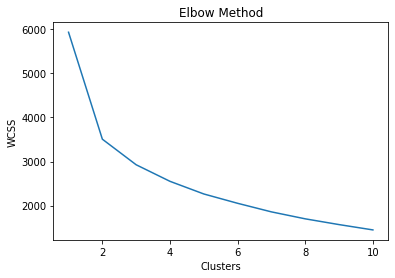

In [135]:
wcss = []
cluster_list = range(1, 11)
for i in cluster_list :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 40)
    kmeans.fit(df_normal)
    wcss.append(kmeans.inertia_)
plt.plot(cluster_list, wcss)
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

Using silhouette score to get a better estimation of cluster number.

In [136]:


kmeans_values=[]

for cluster in range(2,10):
    kmeans = KMeans(n_clusters=cluster, random_state=40).fit_predict(df_normal)
    sil_score = silhouette_score(df_normal,kmeans, metric='euclidean')
    print("Silhouette score for {} cluster k-means: {:.3f}".format(cluster,
      silhouette_score(df_normal, kmeans, metric='euclidean')))
    kmeans_values.append((cluster,sil_score))

Silhouette score for 2 cluster k-means: 0.387
Silhouette score for 3 cluster k-means: 0.372
Silhouette score for 4 cluster k-means: 0.321
Silhouette score for 5 cluster k-means: 0.315
Silhouette score for 6 cluster k-means: 0.334
Silhouette score for 7 cluster k-means: 0.338
Silhouette score for 8 cluster k-means: 0.316
Silhouette score for 9 cluster k-means: 0.334


As we see that the change in Silhouette score is max from 3 to 4 cluster, so we do consider the 3 cluster model for this. Also, there is not a drastic difference in Silhouette scores between 2 cluster and 3 cluster K-means.

In [137]:
kmeans = KMeans(3)
kmeans.fit(df_normal)
labels = kmeans.labels_

kmeans.cluster_centers_.shape

(3, 17)

In [138]:
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_, 
                               columns = [df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.101035,0.973724,0.065205,0.058708,0.035762,0.013969,0.893312,0.798510,0.481784,0.062324,0.018985,0.118446,0.222182,0.063696,0.010080,0.271085,0.958680
1,0.089549,0.826392,0.006031,0.005715,0.002800,0.028794,0.143219,0.081542,0.060573,0.123875,0.035956,0.007475,0.136615,0.029117,0.010800,0.068350,0.908003
2,0.059829,0.913838,0.021728,0.006583,0.035460,0.010673,0.870693,0.098428,0.819531,0.047158,0.014074,0.058018,0.130097,0.027435,0.012007,0.237773,0.919183


In [139]:
# Transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, 
                              columns = [df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1924.029242,0.973724,3197.644439,2393.006939,804.637500,658.461628,0.893312,0.798510,0.481784,0.093486,2.335180,42.403740,6704.360992,3230.732390,770.202261,0.271085,11.752078
1,1705.295073,0.826392,295.772418,232.967078,62.994489,1357.248970,0.143219,0.081542,0.060573,0.185812,4.422613,2.676053,4141.606580,1476.861091,825.232298,0.068350,11.448020
2,1139.333016,0.913838,1065.546930,268.335349,797.856183,503.092784,0.870693,0.098428,0.819531,0.070737,1.731129,20.770309,3946.413724,1391.529811,917.394265,0.237773,11.515097


In [140]:
y_kmeans = kmeans.fit_predict(df_normal)
y_kmeans

array([2, 2, 0, ..., 1, 2, 0], dtype=int32)

In [141]:
# Concatenate the clusters labels to our original dataframe
df_cluster = pd.concat([df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,1.0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,1.0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,0.0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,312.452292,0.000000,12.0,1.0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,1.0


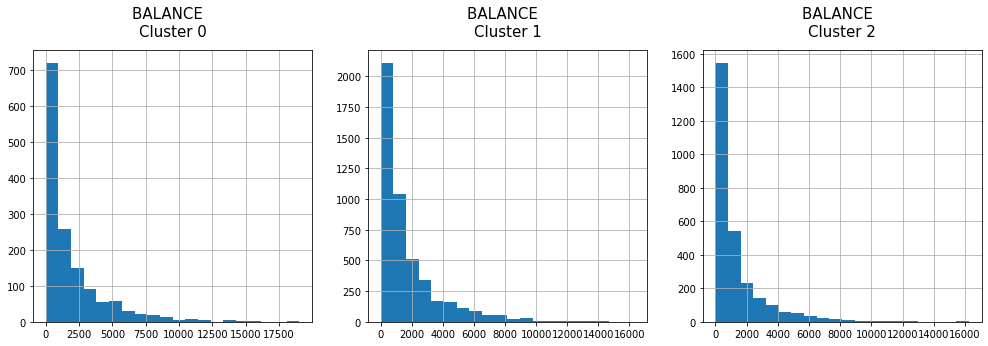

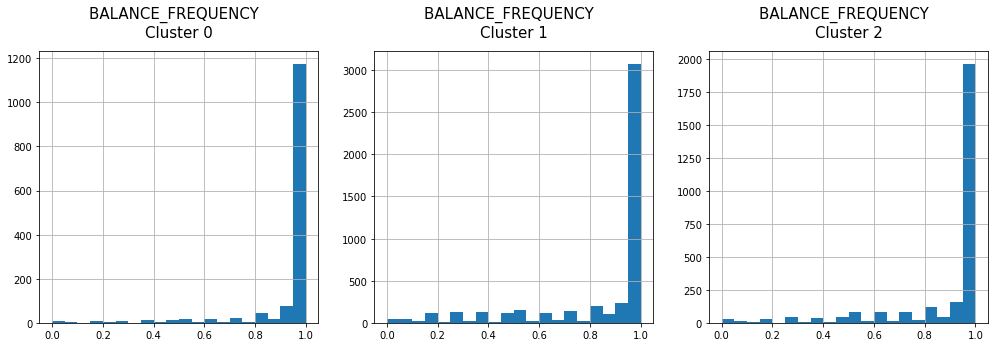

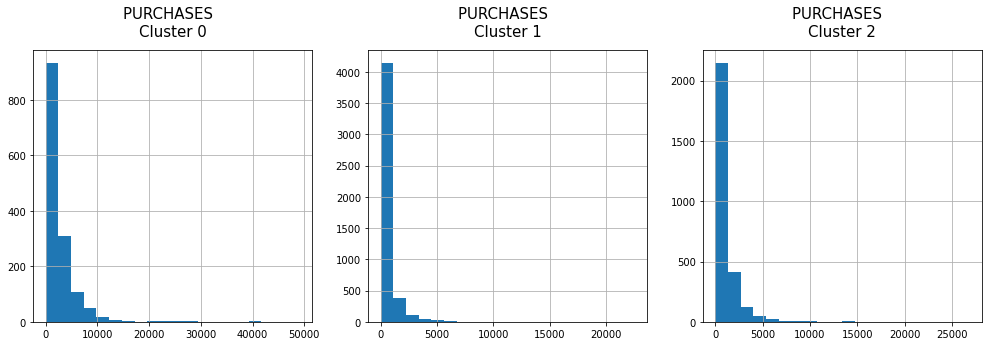

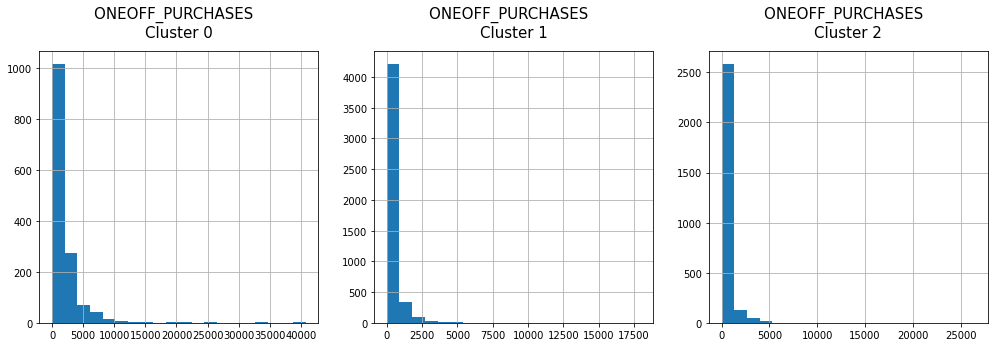

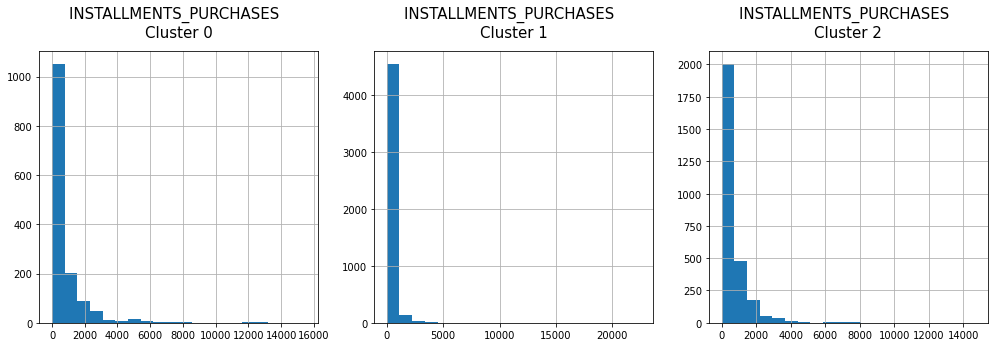

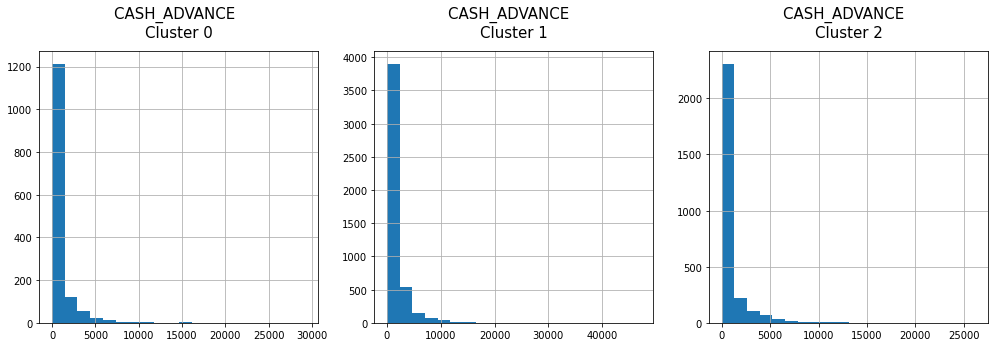

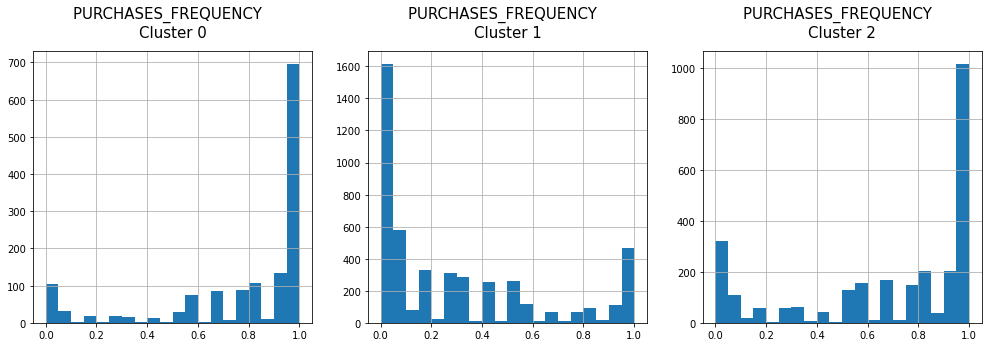

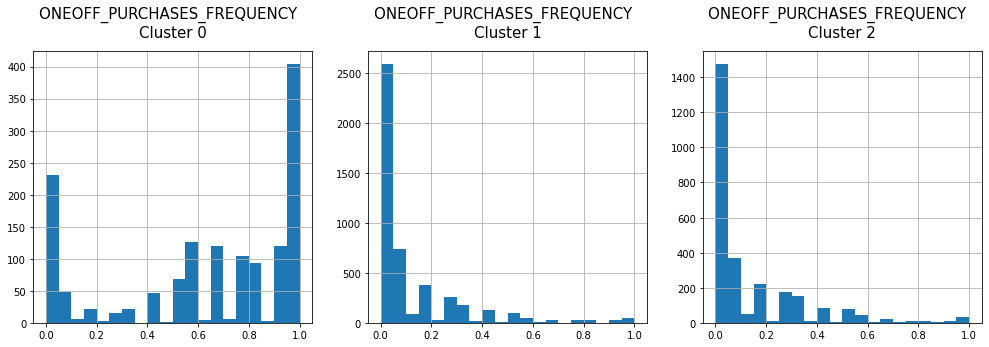

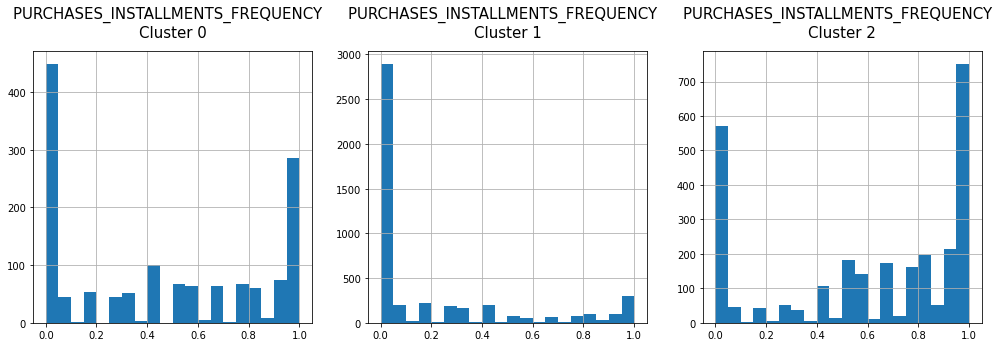

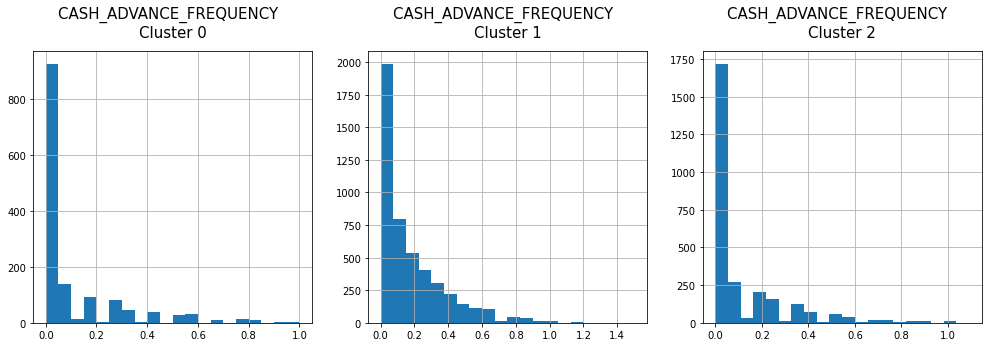

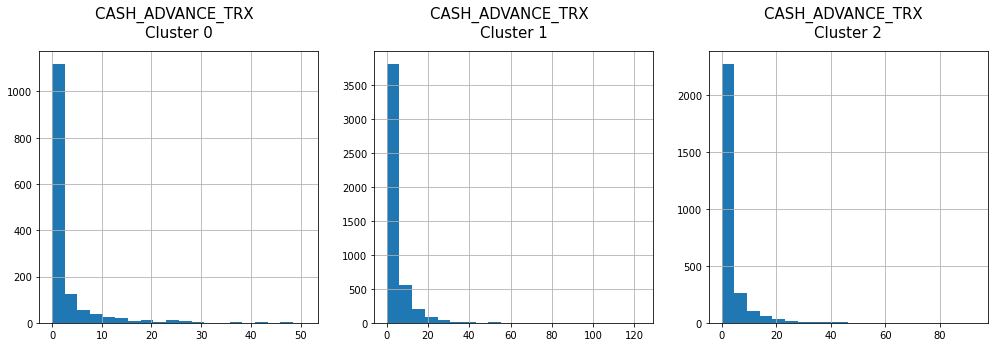

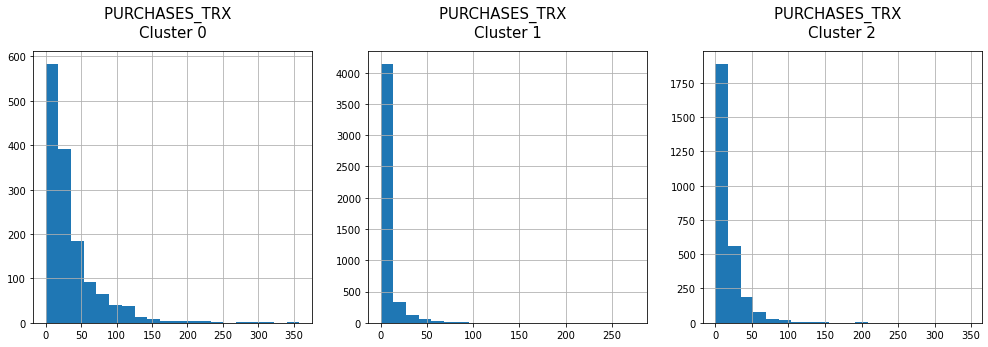

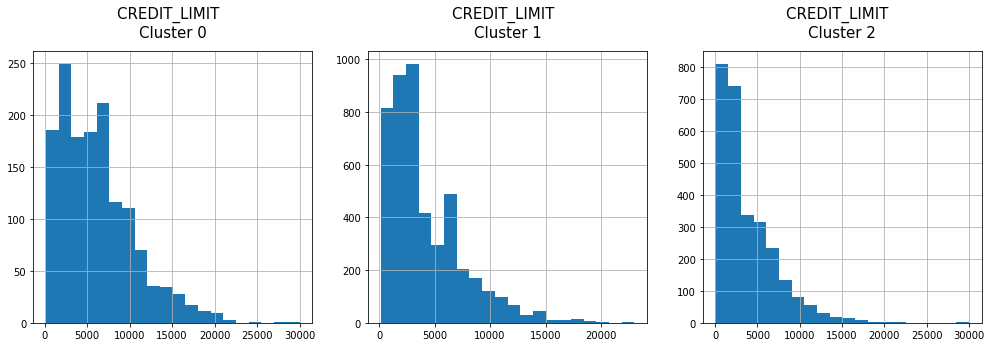

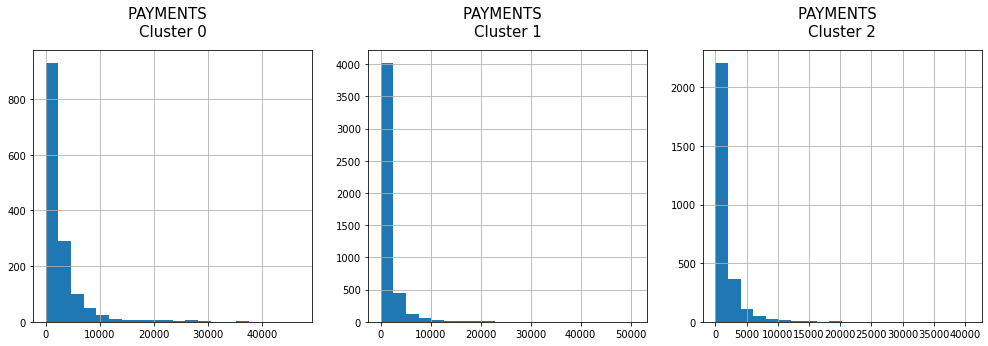

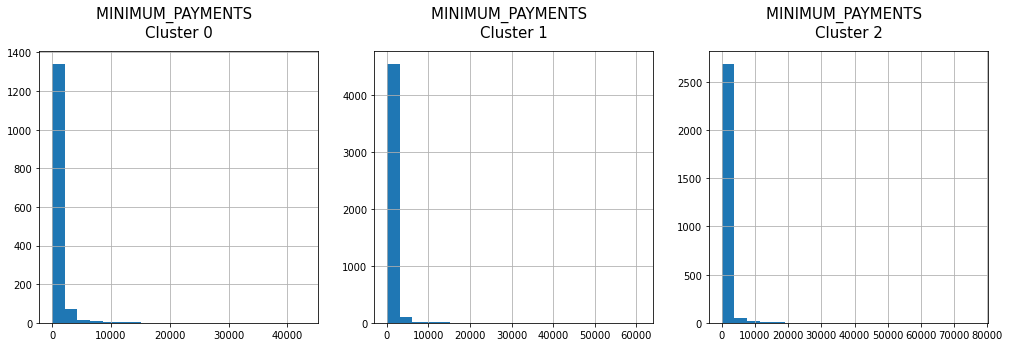

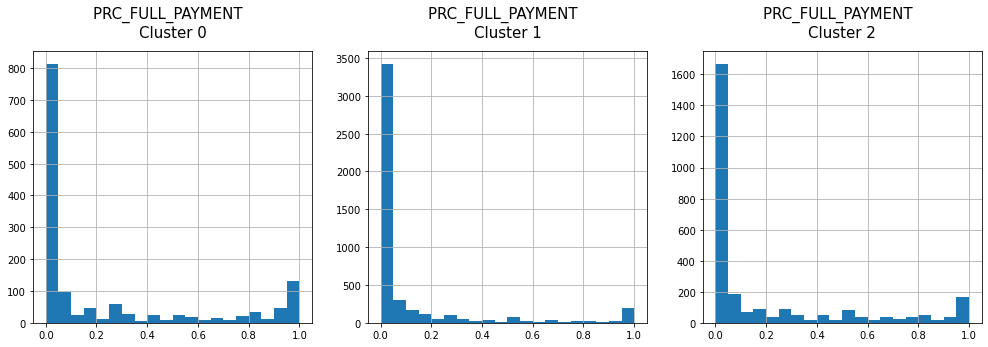

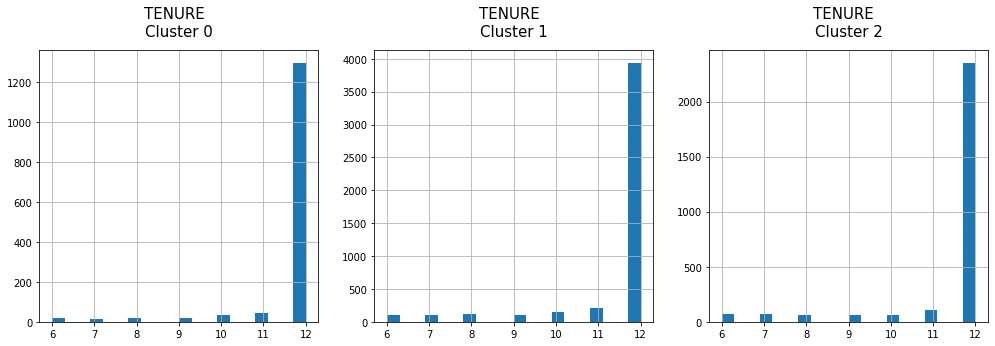

In [142]:
# Plotting the histogram of various clusters
for i in df.columns:
    plt.figure(figsize=(35,5))
    for j in range(3):
        plt.subplot(1,6,j+1)
        cluster = df_cluster[df_cluster['cluster'] == j]
        cluster[i].hist(bins = 20)
        plt.title('{}  \nCluster {}'.format(i,j), color='black', fontsize = 15, y=1.03)
        
plt.show()


Please see the presentation attached to check the interpretation of the clusters.

PRINCIPAL COMPONENT ANALYSIS (For dimensionality reduction)

In [143]:
# Obtaining the principal components
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(df_normal)
principal_comp

array([[-0.48226857, -0.09788385],
       [-0.6087094 , -0.01954948],
       [ 0.30434867,  0.92107257],
       ...,
       [ 0.36058708, -0.42185161],
       [-0.64593223, -0.20350377],
       [-0.09441229,  0.40066072]])

Creating a dataframe with two variables after PCA

In [144]:
pca_df = pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-0.482269,-0.097884
1,-0.608709,-0.019549
2,0.304349,0.921073
3,-0.588699,-0.005678
4,-0.554502,0.052616


In [145]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis=1)
pca_df.head()

,pca1,pca2,cluster
0,-0.482269,-0.097884,1
1,-0.608709,-0.019549,1
2,0.304349,0.921073,0
3,-0.588699,-0.005678,1
4,-0.554502,0.052616,1


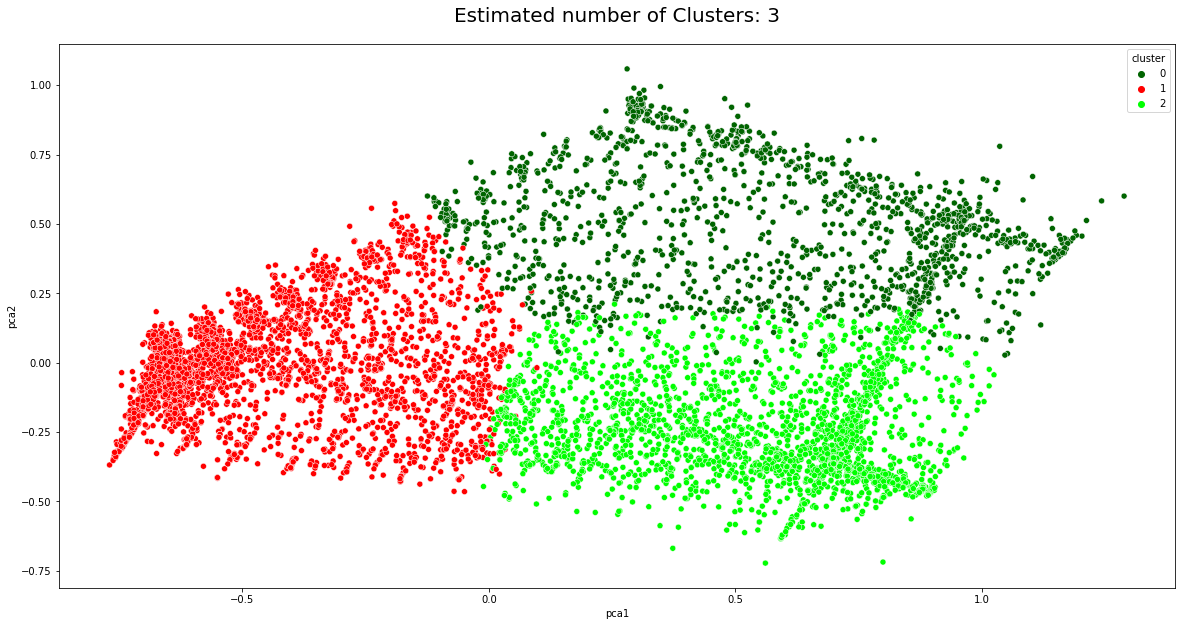

In [146]:
plt.figure(figsize = (20,10))
ax = sns.scatterplot(x='pca1', y='pca2', hue='cluster', 
                     data=pca_df, 
                     palette = ['darkgreen', 'red', 'lime'])
plt.title('Estimated number of Clusters: 3', fontsize = 20, color='black', y=1.03)
plt.show();

Agglomerative Clustering


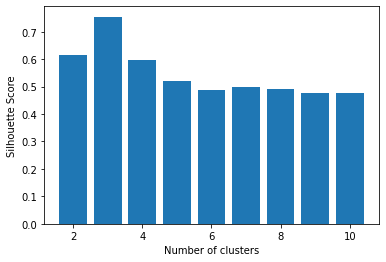

In [147]:
## Calculating the silhouette scores
silhouette_scores = [] 

for n_cluster in range(2, 11):
    silhouette_scores.append( 
     silhouette_score(pca_df, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(pca_df))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

Building with 3 clusters (as the silhouette score is maximum)

In [148]:
agg = AgglomerativeClustering(n_clusters=3)
agg.fit(pca_df)

AgglomerativeClustering(n_clusters=3)

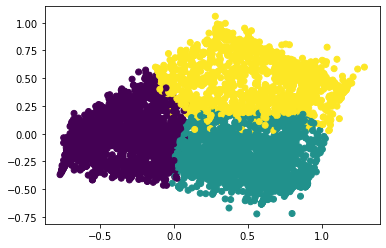

In [149]:
# Visualizing the clustering 
plt.scatter(pca_df['pca1'], pca_df['pca2'],  
           c = AgglomerativeClustering(n_clusters = 3).fit_predict(pca_df)) 
plt.show() 


Density Based Clustering (DBSCAN)

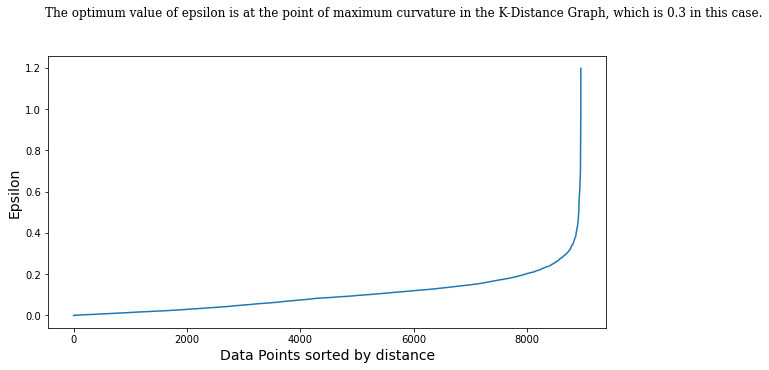

In [150]:
# finding nearest points distance
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df_normal)
distances, indices = nbrs.kneighbors(df_normal)

# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,5))
p=max(distances)+0.5

plt.text(-500, p-0.25, 'The optimum value of epsilon is at the point of maximum curvature in the K-Distance Graph, which is 0.3 in this case.',
        fontfamily='serif', fontsize=12)
plt.plot(distances)
plt.xlabel('Data Points sorted by distance', fontsize=14)
plt.ylabel('Epsilon', fontsize=14)
plt.show()

In [151]:
MinPts=[]
sil_score=[]
for minpts in range (2,20) :    
    MinPts.append(minpts)
    db_clustering= DBSCAN(eps=0.3,min_samples=minpts)
    labels_dbscan = db_clustering.fit_predict(df_normal)
    score = silhouette_score(df_normal,labels_dbscan)
    sil_score.append(score)

In [152]:
dict ={'MinPts':MinPts,'SILHOUETTE SCORE':sil_score}

In [153]:
DBSCAN_DF = pd.DataFrame(dict)

In [154]:
DBSCAN_DF.sort_values('SILHOUETTE SCORE',ascending=False)

,MinPts,SILHOUETTE SCORE
4,6,0.211219
5,7,0.207138
6,8,0.205659
7,9,0.204329
8,10,0.201015
9,11,0.200776
10,12,0.200215
11,13,0.197570
12,14,0.196241
16,18,0.187466


In [155]:
# Building the clustering model 
model = DBSCAN(eps=0.3, min_samples=11) 
  
y = model.fit_predict(df_normal)

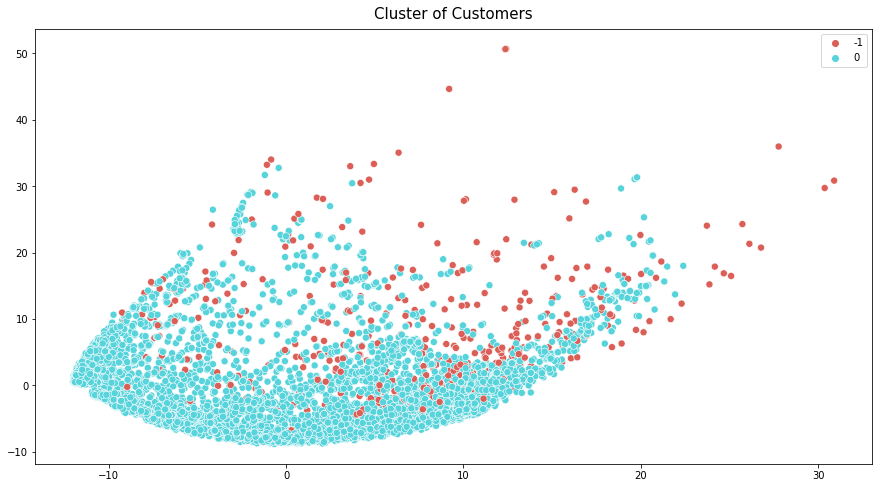

In [156]:
dist = 1-cosine_similarity(df_normal)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)

# Visualizing all the clusters 
plt.figure(figsize=(15,8))
sns.scatterplot(x=X_PCA[:, 0], y=X_PCA[:, 1], 
                hue=y, palette=sns.color_palette('hls', len(np.unique(y))), s=50)
plt.title('Cluster of Customers', size=15, pad=10)
plt.legend(loc=0, bbox_to_anchor=[1,1])
plt.show()

DB-Scan does not do a good job in clustering in this case. It puts most of the sample into one cluster and probably considers the remaining point as noise.